In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Stolen from API practice because we need a url

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0f414cd345395c1f3f169b34786cf25


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
 # Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vaini to
ushuaia ar
iqaluit ca
fairview ca
bredasdorp za
hithadhoo mv
qaanaaq gl
kaitangata nz
kahului us
mount gambier au
te anau nz
mahebourg mu
along in
macaboboni ph
faanui pf
isabela us
rikitea pf
lata sb
hinton ca
tsihombe mg
punta arenas cl
petropavlovsk-kamchatskiy ru
mataura pf
taolanaro mg
bandarbeyla so
rikitea pf
vaini to
nargana pa
taolanaro mg
punta arenas cl
ushuaia ar
yulara au
codrington ag
airai pw
saint george bm
vaini to
hithadhoo mv
butaritari ki
upernavik gl
andenes no
rikitea pf
puerto ayora ec
jacareacanga br
tessalit ml
tuktoyaktuk ca
taolanaro mg
agadez ne
hilo us
ushuaia ar
tautira pf
khatanga ru
hithadhoo mv
lagoa pt
tsihombe mg
taolanaro mg
tiksi ru
saint george bm
ushuaia ar
port alfred za
taolanaro mg
constitucion mx
port hawkesbury ca
thompson ca
ushuaia ar
cidreira br
castro cl
rikitea pf
portland au
egvekinot ru
mayumba ga
belushya guba ru
port-gentil ga
hermanus za
vaini to
fortuna us
phetchabun th
petropavlovsk-kamchatskiy ru
punta arenas cl
cape tow

puerto ayora ec
shahdadkot pk
buala sb
carnarvon au
tasiilaq gl
ulladulla au
laguna br
russkiy ru
bluff nz
punta arenas cl
cayeli tr
severo-kurilsk ru
yuanping cn
hirado jp
hobart au
vaini to
mocuba mz
yellowknife ca
tuatapere nz
leshukonskoye ru
kapaa us
sinjar iq
chabahar ir
mataura pf
cidreira br
port elizabeth za
nikolskoye ru
rio grande br
rikitea pf
tiksi ru
isla mujeres mx
freeport us
hermanus za
taolanaro mg
we nc
victoria sc
kapaa us
barrow us
san patricio mx
coari br
saint-pierre mq
mullaitivu lk
castro cl
north bend us
cape town za
mataura pf
bredasdorp za
umzimvubu za
ushuaia ar
cape town za
punta arenas cl
laiagam pg
vila franca do campo pt
barrow us
kharitonovo ru
rikitea pf
rio gallegos ar
taolanaro mg
weligama lk
sorland no
torbay ca
mecca sa
illoqqortoormiut gl
salvador br
longyearbyen sj
palmer us
bredasdorp za
warwick au
yellowknife ca
vaini to
qaanaaq gl
walvis bay na
bluff nz
vaini to
laguna br
carnarvon au
hilo us
humen cn
port alfred za
khatanga ru
rundu na
pimen

coquimbo cl
cape town za
ushuaia ar
albany au
tiksi ru
new norfolk au
beira mz
cape town za
vaini to
mataura pf
igrim ru
stokmarknes no
jamestown sh
jamestown sh
barentsburg sj
rikitea pf
avarua ck
luanda ao
aksu cn
puerto ayora ec
vila franca do campo pt
tomatlan mx
albany au
ushuaia ar
katsuura jp
pisco pe
narsaq gl
safaga eg
gazanjyk tm
bluff nz
provideniya ru
albany au
lynn haven us
saint-georges gf
illoqqortoormiut gl
juneau us
cape town za
fortuna us
upernavik gl
ust-kamchatsk ru
punta arenas cl
airai pw
pevek ru
tasiilaq gl
lazaro cardenas mx
san cristobal ec
busselton au
hobart au
mataura pf
barrow us
kodiak us
atuona pf
maputo mz
ribas do rio pardo br
chokurdakh ru
busselton au
rorvik no
vaini to
bengkulu id
kochubey ru
mount isa au
saldanha za
lebu cl
vila franca do campo pt
angoche mz
illoqqortoormiut gl
busselton au
mantua cu
kapaa us
broken hill au
tsihombe mg
airai pw
hobart au
poum nc
tasiilaq gl
tasiilaq gl
vaini to
bilma ne
mogadishu so
fairbanks us
georgetown sh
qaana

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | fairview
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | kahului
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | te anau
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | along
Processing Record 14 of Set 1 | macaboboni
City not found. Skipping...
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | isabela
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | lata
Processing Record 19 of Set 1 | hinton
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | petr

Processing Record 35 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 36 of Set 4 | ahipara
Processing Record 37 of Set 4 | poum
Processing Record 38 of Set 4 | hofn
Processing Record 39 of Set 4 | brokopondo
Processing Record 40 of Set 4 | arraial do cabo
Processing Record 41 of Set 4 | pirmasens
Processing Record 42 of Set 4 | sambava
Processing Record 43 of Set 4 | hambantota
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | albany
Processing Record 46 of Set 4 | nemuro
Processing Record 47 of Set 4 | kalabo
Processing Record 48 of Set 4 | karratha
Processing Record 49 of Set 4 | barbar
City not found. Skipping...
Processing Record 50 of Set 4 | provideniya
Processing Record 1 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 2 of Set 5 | luanda
Processing Record 3 of Set 5 | ostrovnoy
Processing Record 4 of Set 5 | isangel
Processing Record 5 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 6 of Set 5

Processing Record 24 of Set 8 | mecca
Processing Record 25 of Set 8 | salvador
Processing Record 26 of Set 8 | palmer
Processing Record 27 of Set 8 | warwick
Processing Record 28 of Set 8 | walvis bay
Processing Record 29 of Set 8 | humen
Processing Record 30 of Set 8 | rundu
Processing Record 31 of Set 8 | pimentel
Processing Record 32 of Set 8 | concordia
Processing Record 33 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 34 of Set 8 | kushmurun
Processing Record 35 of Set 8 | lamu
Processing Record 36 of Set 8 | dwarka
Processing Record 37 of Set 8 | angra
City not found. Skipping...
Processing Record 38 of Set 8 | gao
Processing Record 39 of Set 8 | challans
Processing Record 40 of Set 8 | leme
Processing Record 41 of Set 8 | belyy yar
Processing Record 42 of Set 8 | mirandopolis
Processing Record 43 of Set 8 | grand gaube
Processing Record 44 of Set 8 | yumen
Processing Record 45 of Set 8 | guajara-mirim
City not found. Skipping...
Processing Record 46 of S

Processing Record 11 of Set 12 | kostomuksha
Processing Record 12 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 13 of Set 12 | lazaro cardenas
Processing Record 14 of Set 12 | shache
Processing Record 15 of Set 12 | shush
Processing Record 16 of Set 12 | pokaran
Processing Record 17 of Set 12 | whitehorse
Processing Record 18 of Set 12 | brownsville
Processing Record 19 of Set 12 | beira
Processing Record 20 of Set 12 | igrim
Processing Record 21 of Set 12 | stokmarknes
Processing Record 22 of Set 12 | aksu
Processing Record 23 of Set 12 | tomatlan
Processing Record 24 of Set 12 | pisco
Processing Record 25 of Set 12 | safaga
Processing Record 26 of Set 12 | gazanjyk
Processing Record 27 of Set 12 | lynn haven
Processing Record 28 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 29 of Set 12 | maputo
Processing Record 30 of Set 12 | ribas do rio pardo
Processing Record 31 of Set 12 | rorvik
Processing Record 32 of Set 12 | kochubey
Processing

In [12]:
len(city_data)

533

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,73.56,88,75,8.05,TO,2021-09-30 21:12:57
1,Ushuaia,-54.8000,-68.3000,46.06,39,40,4.61,AR,2021-09-30 21:09:09
2,Iqaluit,63.7506,-68.5145,29.93,100,40,3.00,CA,2021-09-30 21:12:57
3,Fairview,40.8126,-73.9990,66.02,49,90,6.91,US,2021-09-30 21:12:58
4,Bredasdorp,-34.5322,20.0403,55.27,97,63,6.04,ZA,2021-09-30 21:12:58
5,Hithadhoo,-0.6000,73.0833,81.34,74,69,2.44,MV,2021-09-30 21:12:58
6,Qaanaaq,77.4840,-69.3632,26.49,88,100,11.45,GL,2021-09-30 21:12:59
7,Kaitangata,-46.2817,169.8464,52.93,62,96,11.12,NZ,2021-09-30 21:12:59
8,Kahului,20.8947,-156.4700,85.26,84,75,14.97,US,2021-09-30 21:08:18
9,Mount Gambier,-37.8333,140.7667,53.51,94,90,17.27,AU,2021-09-30 21:13:00


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

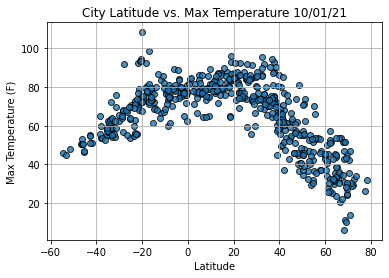

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

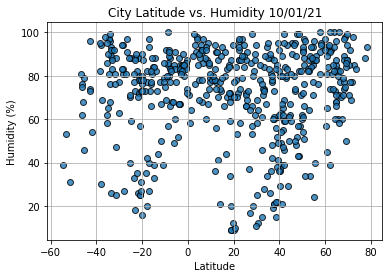

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

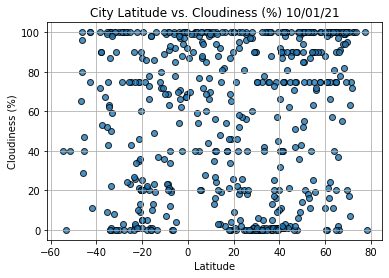

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

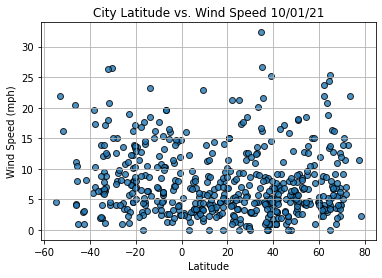

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()